# Détection des faux Billets

Ce projet a pour but de créer un algorithme de détection de faux billets et revoir des notions vues aux épisodes précédents.

Le [jeu de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/notes.csv)  contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

 - la longueur du billet (en mm) ;  
 - la hauteur du billet (mesurée sur le côté gauche, en mm) ;  
 - La hauteur du billet (mesurée sur le côté droit, en mm) ;  
 - la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;  
 - la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;  
 - la diagonale du billet (en mm).

L'étude va consister en 3 parties : 

Partie 1 : analyse exploratoire univariée et bivariée de votre jeu de données  

Partie 2 : ACP 
    Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :  
        - choix du nombre des composantes
        - représentation des variables par le cercle des corrélations 
        - représentation des individus par les plans factoriels 
        - analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

Partie 3 : Réaliser une classification des billets (révisions de kmeans ou régression logique, et aller creuser côté CAH)

In [97]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit


## Partie 1 : ANALYSES BIVARIES

Dans cette partie, vous allez explorer vos données via des visualisations, par exemple :   
    
    - le nombre de billets vrai/faux  
    - les distributions de longueurs, largeurs and co des billets de votre dataset
    - longueur/largeur and co des billets vrais vs. faux : est-ce que visuellement on peut déterminer des caractéristiques des vrais ou des faux billets ?
    - etc -> be creative :)

In [145]:
data=pd.read_csv('notes.csv')

In [16]:
data.shape

(170, 7)

In [3]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


<AxesSubplot:xlabel='is_genuine', ylabel='count'>

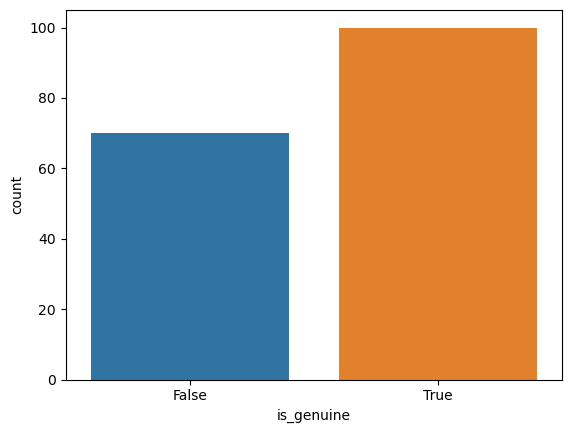

In [4]:
sns.countplot(data=data,x='is_genuine')

<AxesSubplot:xlabel='is_genuine', ylabel='diagonal'>

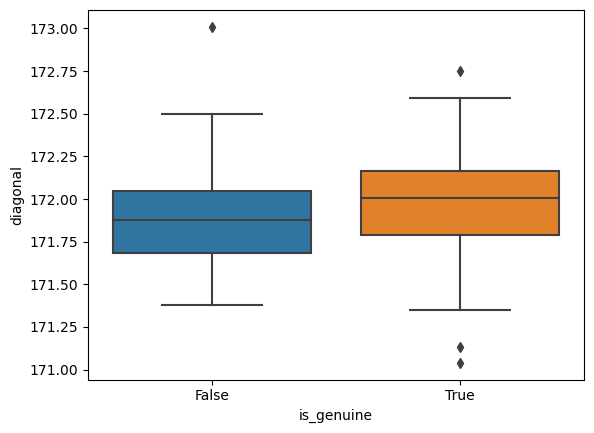

In [27]:
sns.boxplot(data=data,x='is_genuine',y='diagonal')

<AxesSubplot:xlabel='is_genuine', ylabel='height_left'>

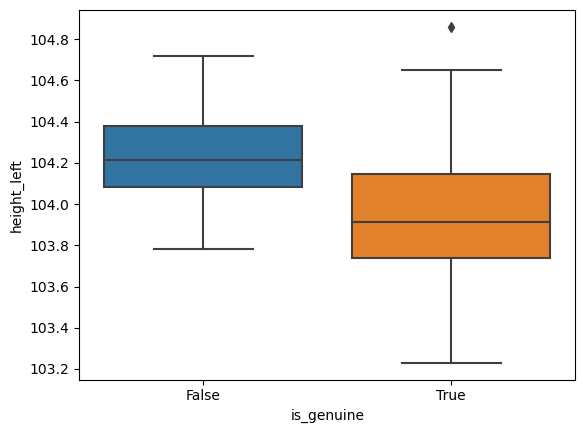

In [29]:
sns.boxplot(data=data,x='is_genuine',y='height_left')

<AxesSubplot:xlabel='is_genuine', ylabel='height_right'>

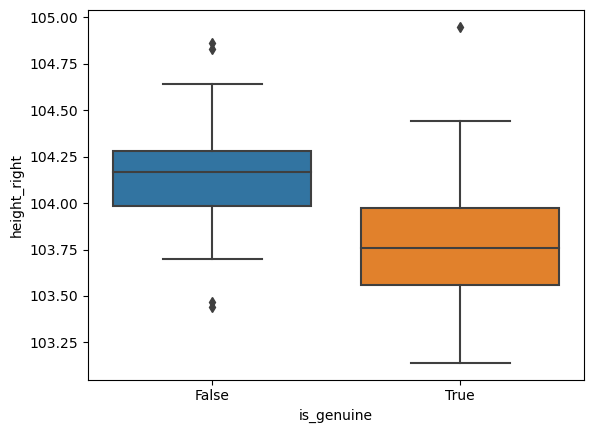

In [30]:
sns.boxplot(data=data,x='is_genuine',y='height_right')

<AxesSubplot:xlabel='is_genuine', ylabel='margin_low'>

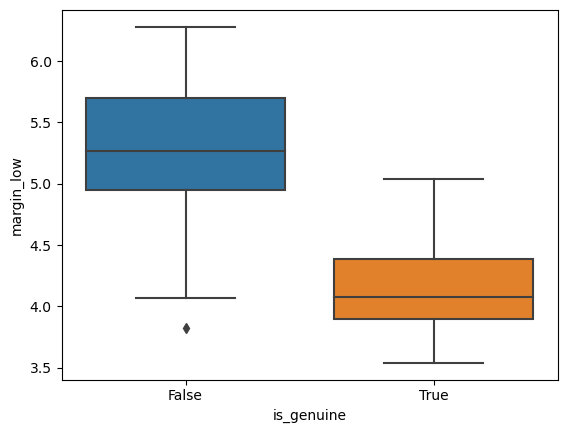

In [31]:
sns.boxplot(data=data,x='is_genuine',y='margin_low')

<AxesSubplot:xlabel='is_genuine', ylabel='margin_up'>

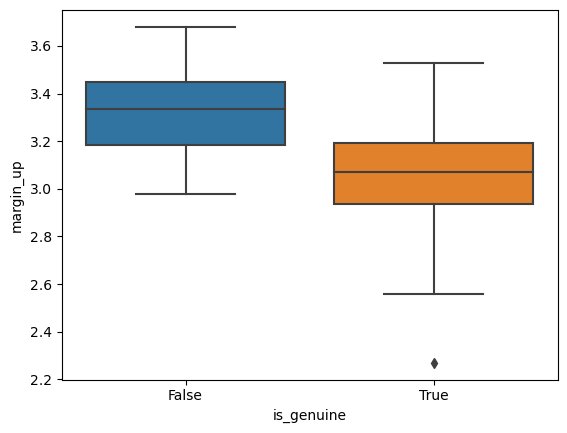

In [32]:
sns.boxplot(data=data,x='is_genuine',y='margin_up')

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

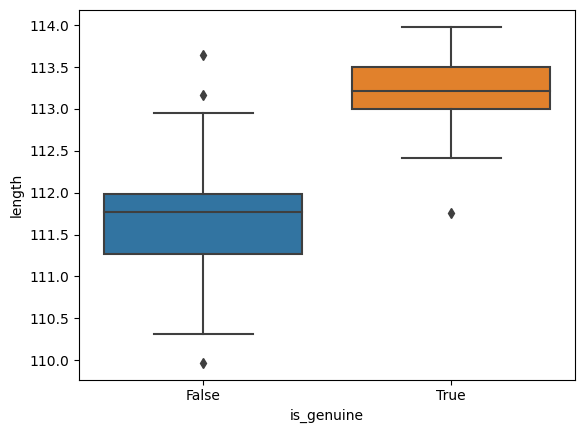

In [33]:
sns.boxplot(data=data,x='is_genuine',y='length')

<AxesSubplot:xlabel='height_left', ylabel='height_right'>

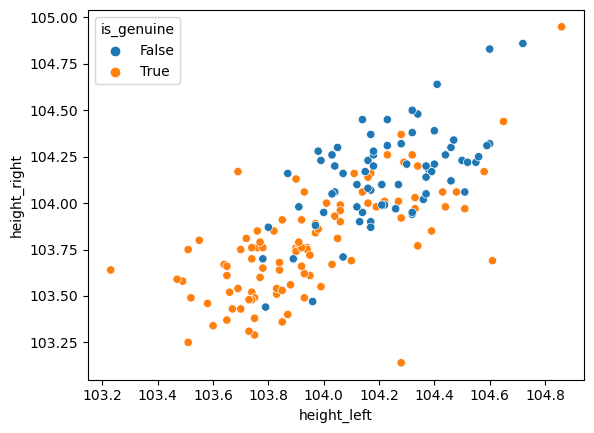

In [34]:
sns.scatterplot(data=data,x='height_left',y='height_right',hue='is_genuine')

<AxesSubplot:xlabel='margin_up', ylabel='margin_low'>

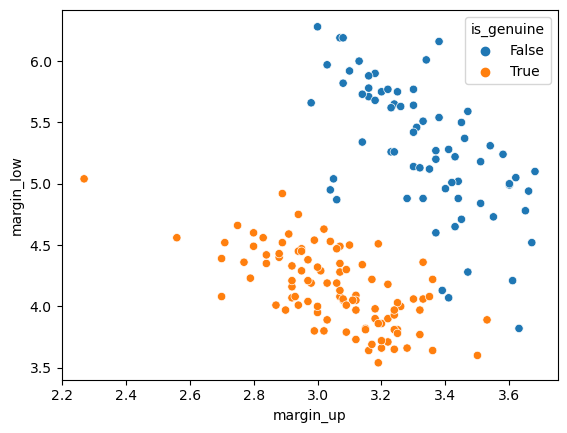

In [35]:
sns.scatterplot(data=data,x='margin_up',y='margin_low',hue='is_genuine')

<AxesSubplot:xlabel='margin_up', ylabel='length'>

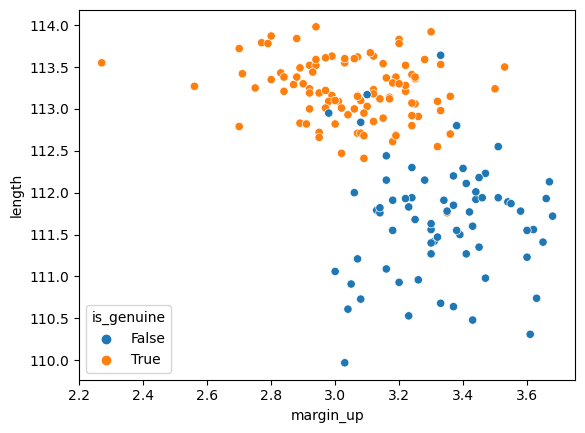

In [36]:
sns.scatterplot(data=data,x='margin_up',y='length',hue='is_genuine')

<AxesSubplot:>

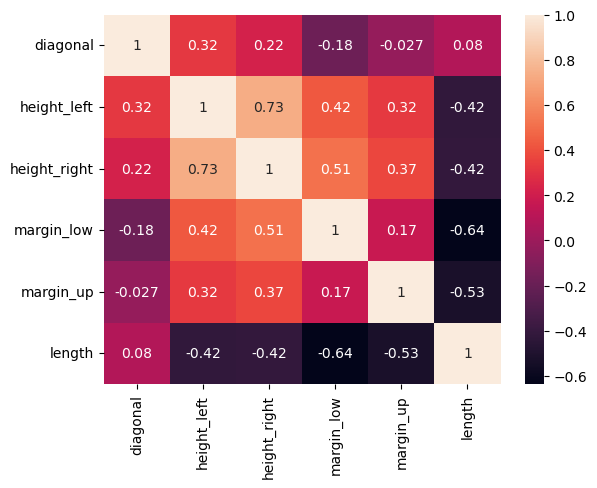

In [95]:
sns.heatmap(data2.corr(),annot=True)

In [108]:
from scipy import stats
from statsmodels.formula.api import ols

In [199]:
model = ols('margin_up ~ is_genuine', data=data).fit()

In [200]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9861070513725281, pvalue=0.08986960351467133)

In [193]:
stats.levene(data['margin_up'][data['is_genuine'] == True],
             data['margin_up'][data['is_genuine'] == False])

LeveneResult(statistic=0.000516090234831502, pvalue=0.9819024811475876)

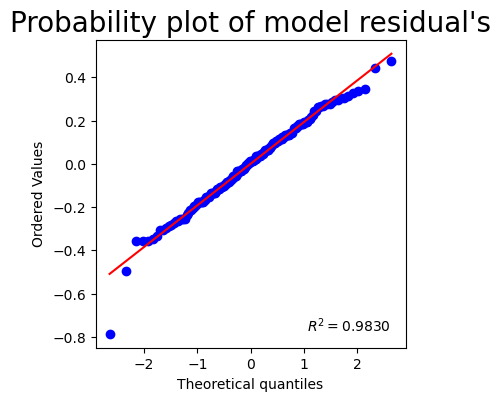

In [198]:
fig = plt.figure(figsize= (4, 4))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

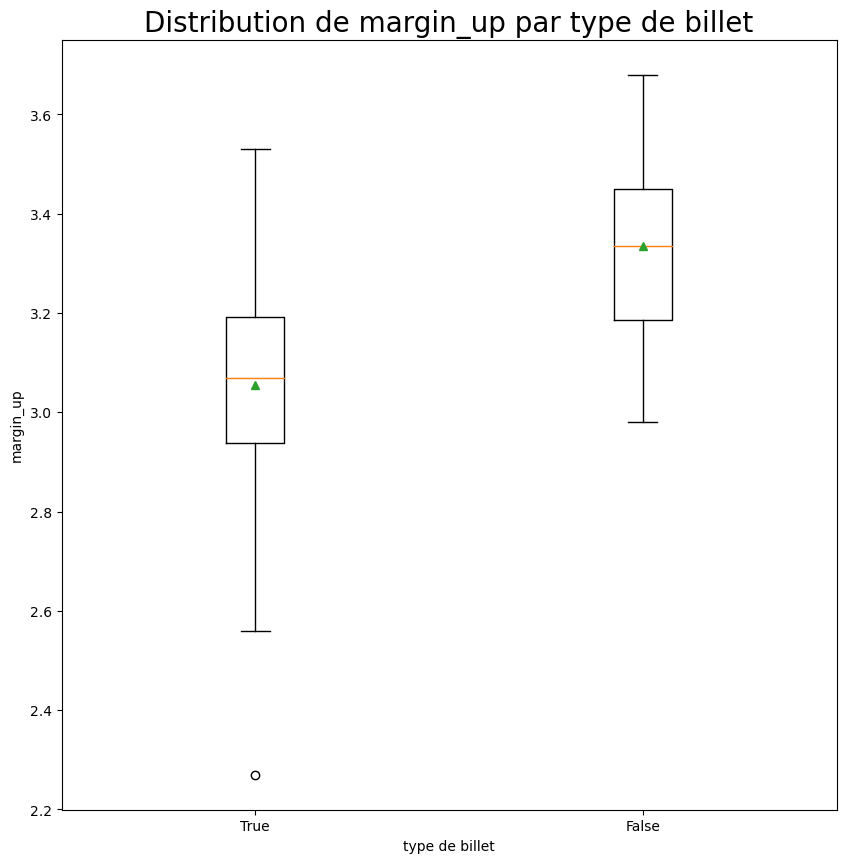

In [194]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distribution de margin_up par type de billet", fontsize= 20)
ax.set

datatempo = [data['margin_up'][data['is_genuine'] == True],
        data['margin_up'][data['is_genuine'] == False]]

ax.boxplot(datatempo,
           labels= ['True', 'False'],
           showmeans= True)

plt.xlabel("type de billet")
plt.ylabel("margin_up")

plt.show()

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



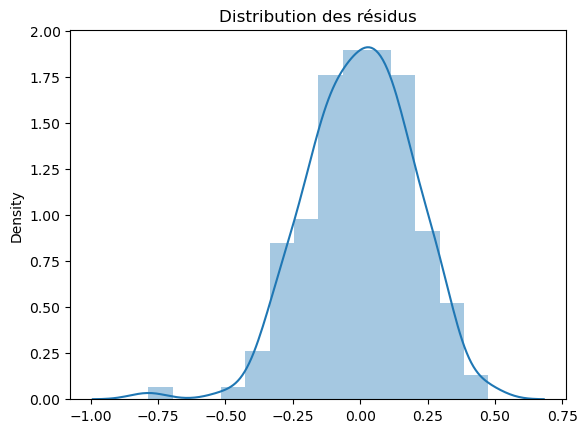

In [202]:
sns.distplot(x=model.resid)
plt.title('Distribution des résidus')
plt.show()

In [142]:
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
is_genuine,3.206859,1.0,86.413125,7.567386e-17
Residual,6.234612,168.0,NaN,NaN


p-value < 0,05 : On peut dire qu'il y a une différence significative de margin_up entre les faux et vrais billets

## Partie 2 : ANALYSE EN COMPOSANTES PRINCIPALES

Repartez de l'exploration via l'étude VISA pour cette partie + le cours sur OC
Dans tous les cas, je veux voir ce que j'ai cité plus haut.

In [37]:
data2 = data.drop("is_genuine", axis = 1)
data2.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


In [41]:
from sklearn.preprocessing import scale

In [42]:
pca = PCA(n_components = 6)
pca.fit(scale(data2))

PCA(n_components=6)

In [43]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]
[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


In [48]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.863721,47.0,47.0
1,Dim2,1.325222,22.0,69.0
2,Dim3,0.859125,14.0,84.0
3,Dim4,0.514605,9.0,92.0
4,Dim5,0.278407,5.0,97.0
5,Dim6,0.194424,3.0,100.0


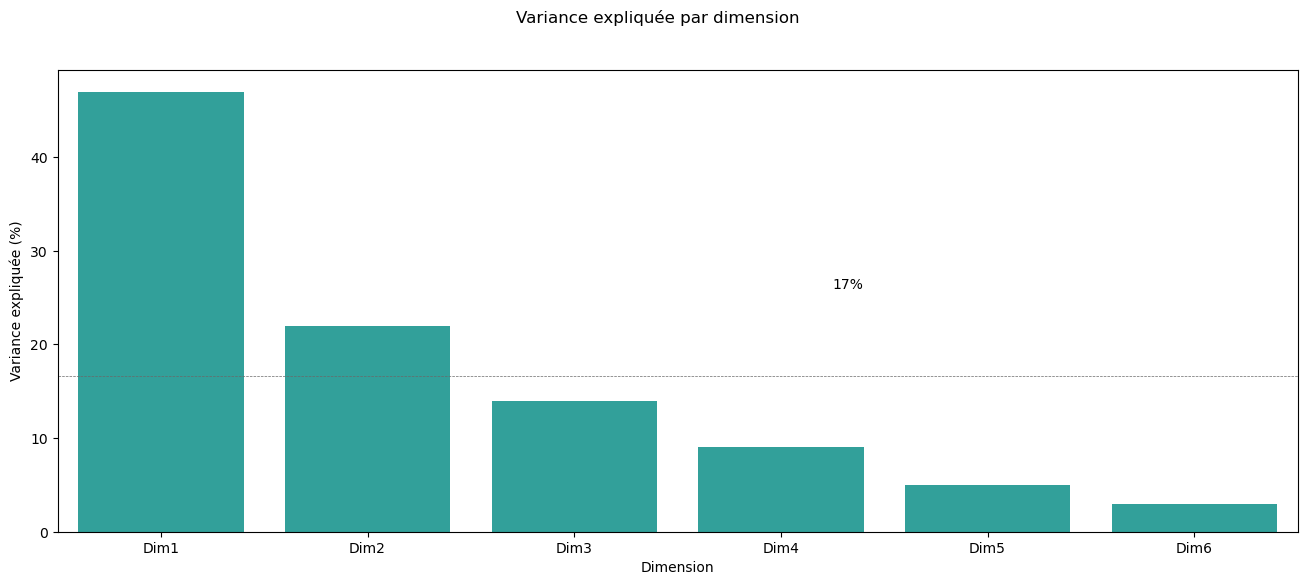

In [70]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "17%")
plt.axhline(y = (100/6), linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

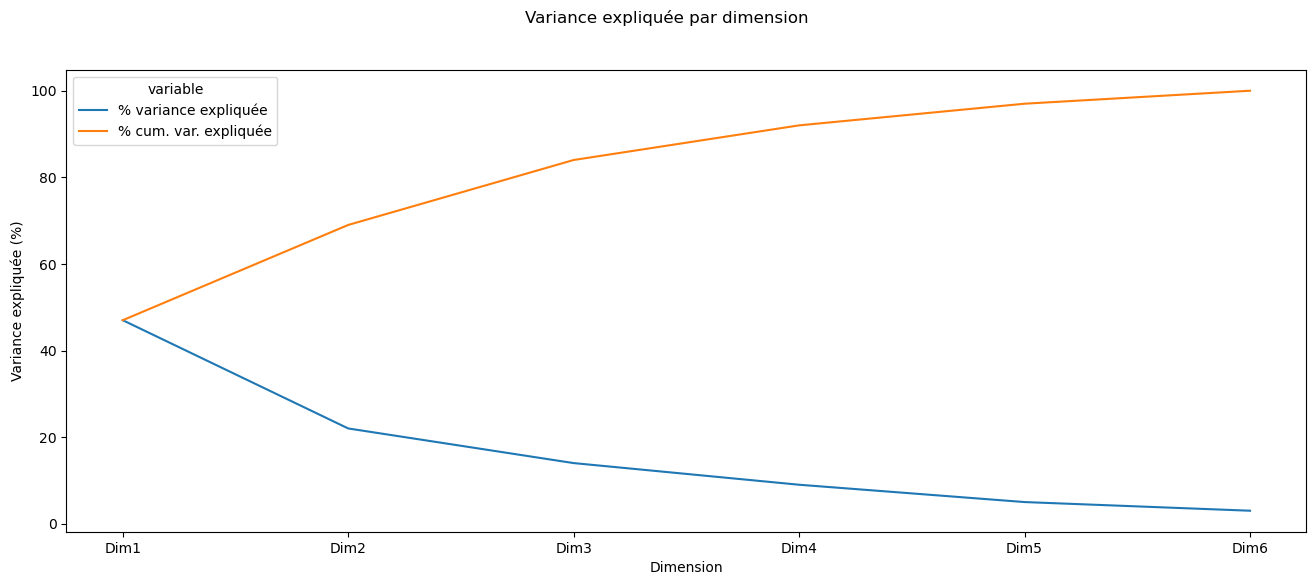

In [52]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = sns.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [86]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [87]:
data_pca = pca.transform(data[data.columns[1:7]])
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1], 
    "Dim3" : data_pca[:,2],
    "is_genuine" : data.is_genuine
})
data_pca_df.head()

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,Dim3,is_genuine
0,64.526237,227.876239,28.008617,True
1,62.927694,227.403685,27.504555,True
2,62.894108,227.595919,27.763602,True
3,62.740869,227.668243,27.184494,True
4,63.072546,227.534453,28.527434,True


In [88]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 7)], index=data.columns[1:7])
coordvar_df

,PC1,PC2,PC3,PC4,PC5,PC6
diagonal,0.124000,0.897507,-0.082395,-0.401529,-0.118769,0.053867
height_left,0.804670,0.390539,0.113785,0.199459,0.377750,0.102355
height_right,0.832286,0.271153,0.142584,0.329224,-0.256958,-0.212007
margin_low,0.729406,-0.368997,0.475316,-0.162502,-0.164576,0.241469
margin_up,0.596587,-0.162455,-0.761115,0.097087,-0.102332,0.156258
length,-0.787529,0.362089,0.117635,0.411551,-0.134241,0.231028


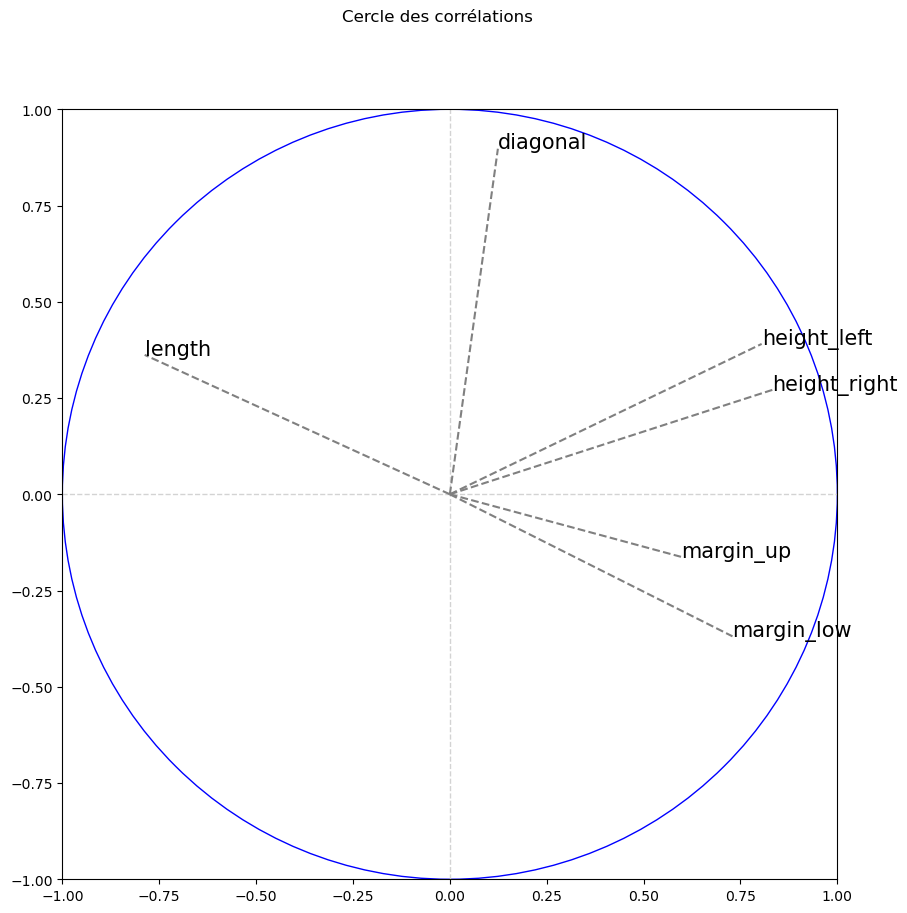

In [89]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 15)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

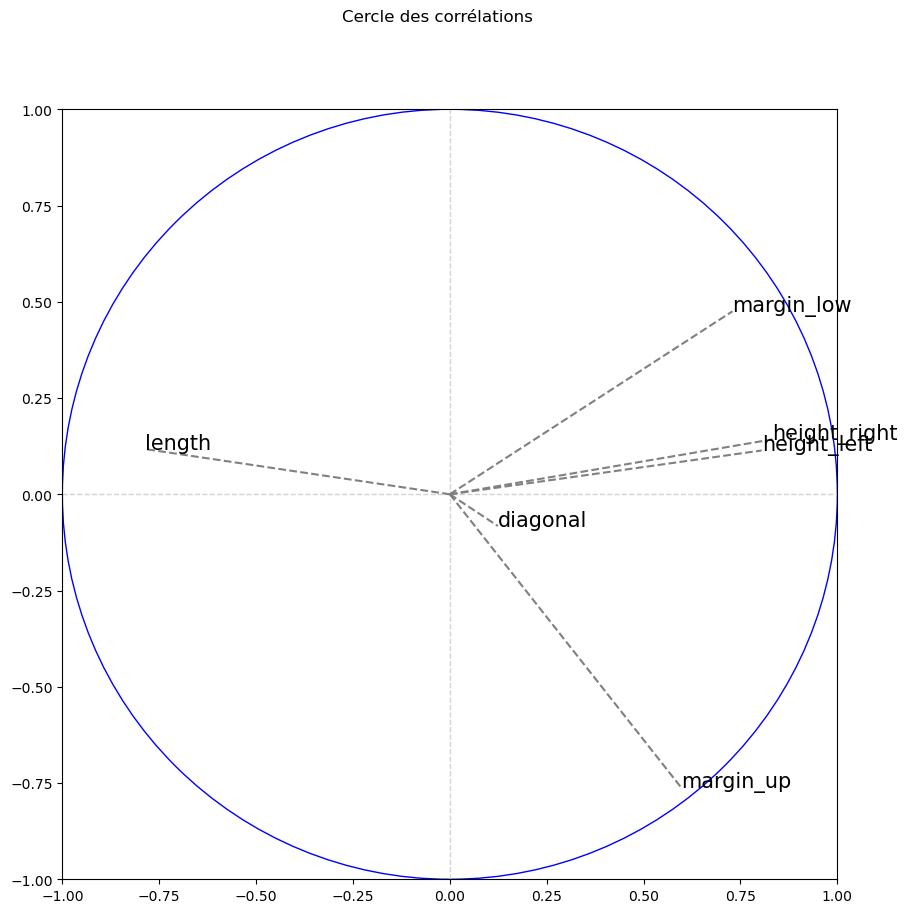

In [90]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC3"][j], coordvar_df.index[j], size = 15)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC3"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

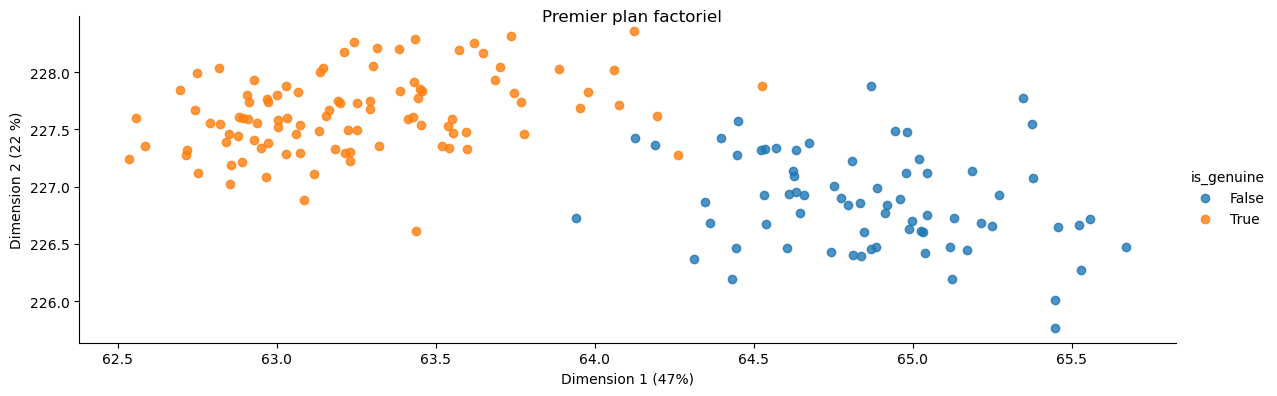

In [91]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim2", hue = "is_genuine", data = data_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (47%)", ylabel = "Dimension 2 (22 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

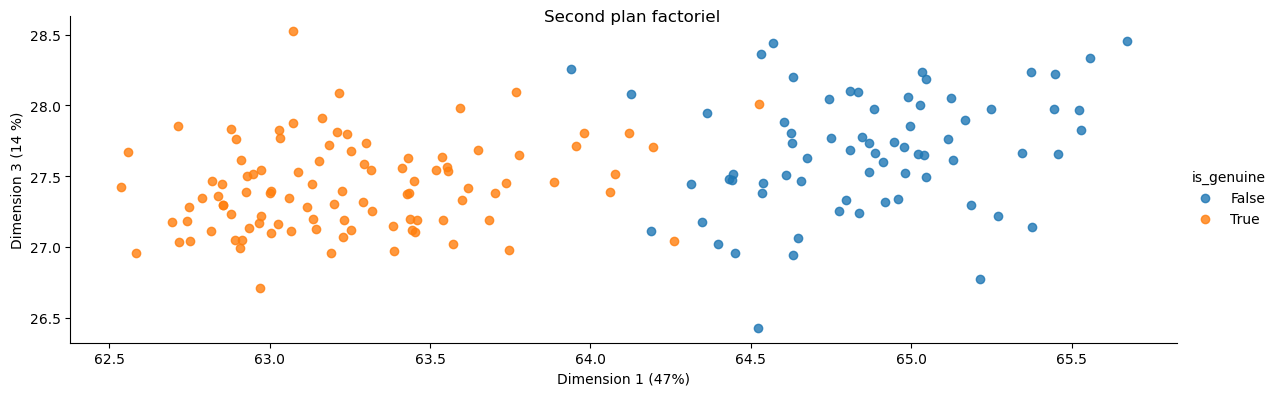

In [203]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim3", hue = "is_genuine", data = data_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (47%)", ylabel = "Dimension 3 (14 %)")
g_pca.fig.suptitle("Second plan factoriel")

plt.show()

In [94]:
import plotly.express as px
fig = px.scatter_3d(data_pca_df, x='Dim1', y='Dim2', z='Dim3',
              color='is_genuine')
fig.show()

## Partie 3 : PREDICTION

Effectuer la prédiction de nouveaux billets via un algorithme que vous allez mettre en place (kmeans? regression logistique? A vous de voir).  

In [150]:
data_pca_df

,Dim1,Dim2,Dim3,is_genuine
0,64.526237,227.876239,28.008617,True
1,62.927694,227.403685,27.504555,True
2,62.894108,227.595919,27.763602,True
3,62.740869,227.668243,27.184494,True
4,63.072546,227.534453,28.527434,True
...,...,...,...,...
165,65.044976,227.120210,27.497065,False
166,65.345072,227.776293,27.661950,False
167,65.186843,227.136693,27.297204,False
168,64.347474,226.867666,27.177768,False


In [151]:
# Choose your feature and your target
X = data_pca_df[['Dim1','Dim2','Dim3']]
y = data_pca_df['is_genuine']

In [152]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.9607843137254902

In [154]:
from sklearn.metrics import classification_report

In [156]:
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['True','False']))

              precision    recall  f1-score   support

        True       0.93      0.93      0.93        15
       False       0.97      0.97      0.97        36

    accuracy                           0.96        51
   macro avg       0.95      0.95      0.95        51
weighted avg       0.96      0.96      0.96        51



In [157]:
from sklearn.cluster import KMeans

In [211]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2, random_state=2)

In [212]:
y_pred=kmeans.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['True','False']))

              precision    recall  f1-score   support

        True       0.94      1.00      0.97        15
       False       1.00      0.97      0.99        36

    accuracy                           0.98        51
   macro avg       0.97      0.99      0.98        51
weighted avg       0.98      0.98      0.98        51

